<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/FPGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Import library yang dibutuhkan
import numpy as np #operasi matematika dalam bentuk array
import pandas as pd #preprocessing dan data analisis
import matplotlib.pyplot as plt #visualisasi data
import missingno as msno #mengidentifikasi data yang bernilai null
%matplotlib inline

In [55]:
# Baca Dataset
data_movies = pd.read_csv('movies.csv')
data_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [56]:
data_tages = pd.read_csv('tags.csv')
data_tages

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [57]:
data_ratings = pd.read_csv('ratings.csv')
data_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [58]:
#Menghitung Panjang Dataset
print("Panjang Dataset Movies:") 
data_movies.shape

Panjang Dataset Movies:


(9742, 3)

Total Jumlah Data Pengamatan: 9742


movieId    0
title      0
genres     0
dtype: int64

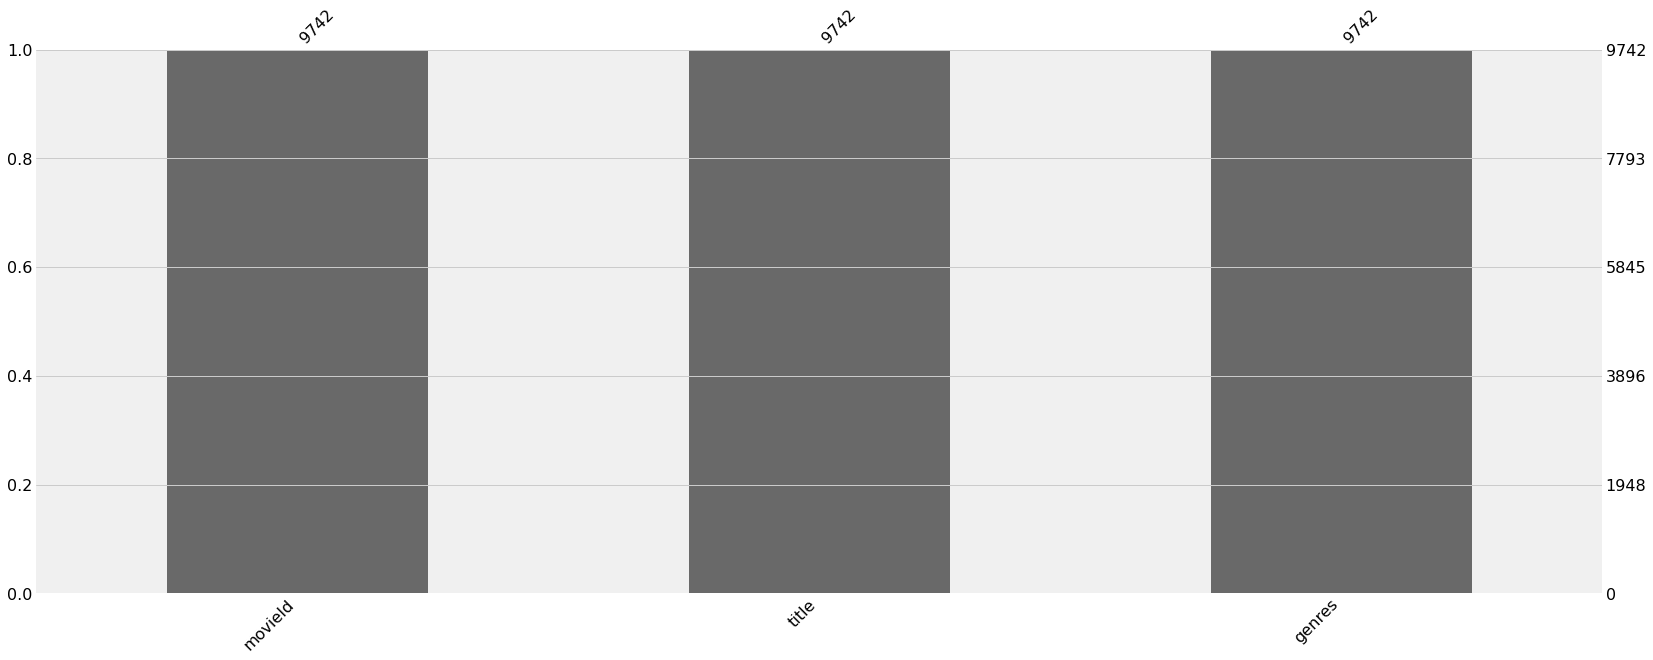

In [59]:
#Cek Nilai Kosong
print ('Total Jumlah Data Pengamatan:',data_movies.shape[0])
msno.bar(data_movies)
data_movies.isnull().sum()

In [60]:
print("Panjang Dataset Tags:")
data_tages.shape

Panjang Dataset Tags:


(3683, 4)

Total Jumlah Data Pengamatan: 3683


userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

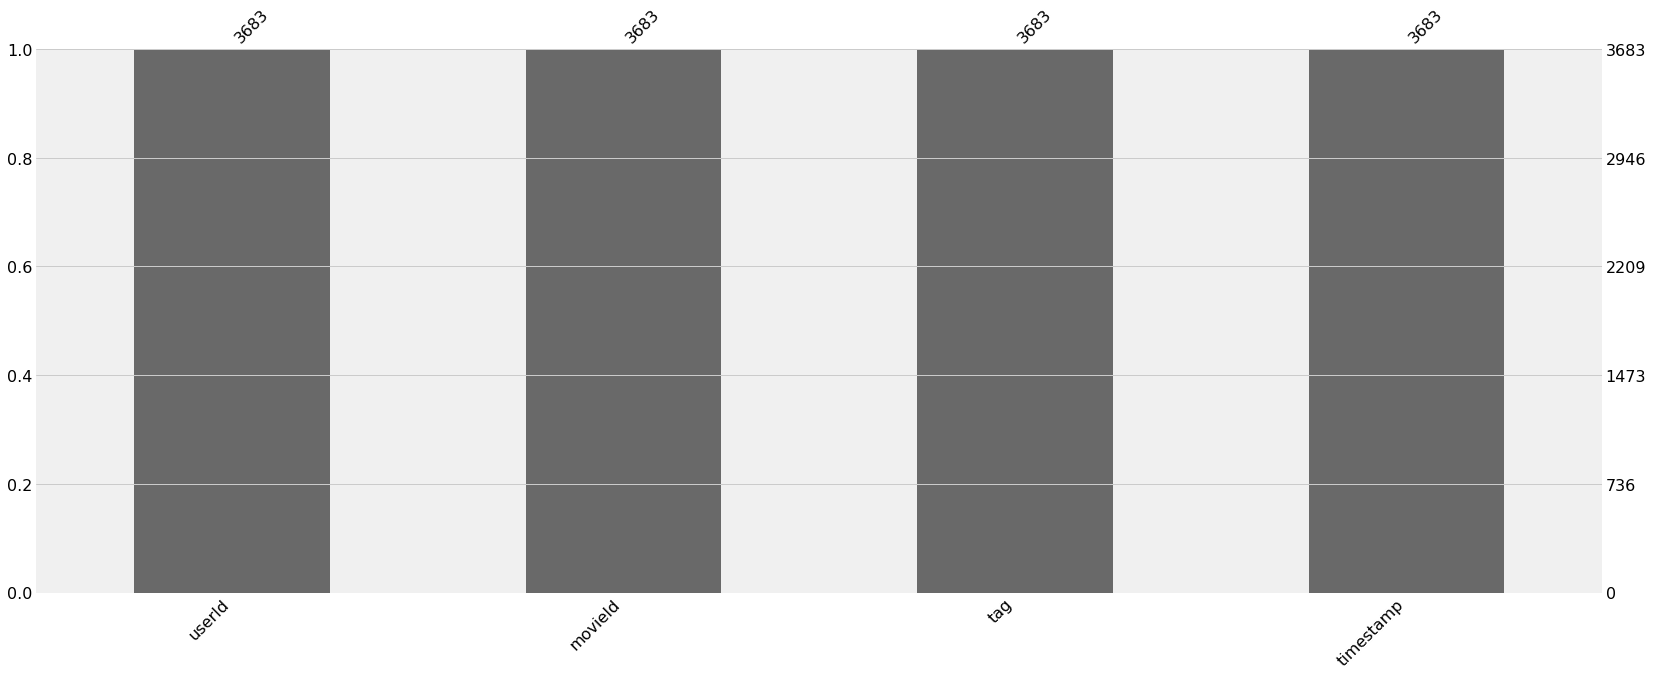

In [61]:
#Cek Nilai Kosong
print ('Total Jumlah Data Pengamatan:',data_tages.shape[0])
msno.bar(data_tages)
data_tages.isnull().sum()

In [62]:
print("Panjang Dataset Ratings:")
data_ratings.shape

Panjang Dataset Ratings:


(100836, 4)

Total Jumlah Data Pengamatan: 100836


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

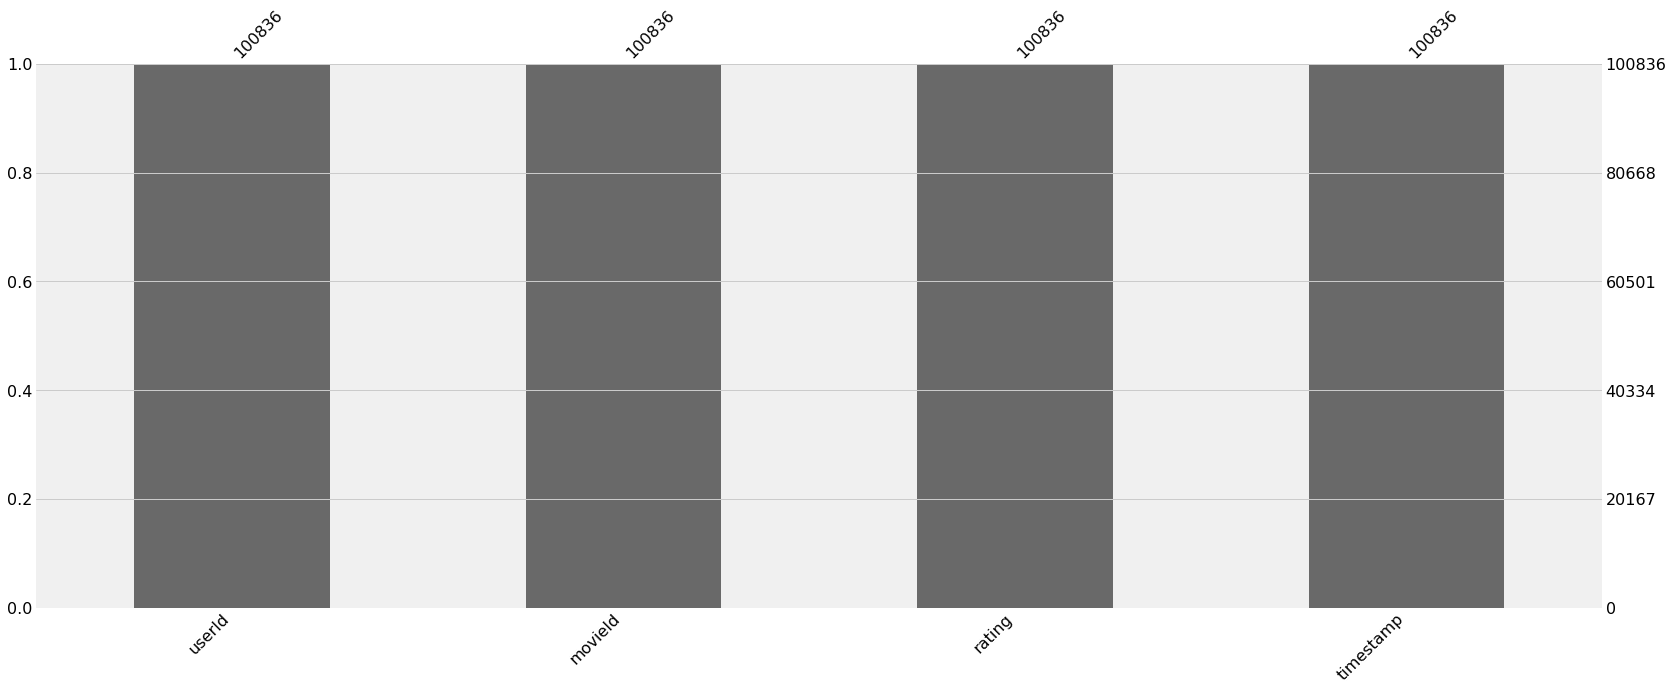

In [63]:
#Cek Nilai Kosong
print ('Total Jumlah Data Pengamatan:',data_ratings.shape[0])
msno.bar(data_ratings)
data_ratings.isnull().sum()

In [64]:
#Preprocessing
data_movies.movieId.value_counts(),print('Jumlah Data yang Bernilai Duplikat pada Dataset Movies: ',data_movies.movieId.duplicated().sum())

Jumlah Data yang Bernilai Duplikat pada Dataset Movies:  0


(1         1
 53322     1
 53129     1
 53138     1
 53140     1
          ..
 4390      1
 4392      1
 4393      1
 4394      1
 193609    1
 Name: movieId, Length: 9742, dtype: int64, None)

In [65]:
#Menghitung jumlah tag pada masing-masing id movie
data_tages.movieId.value_counts()

296     181
2959     54
924      41
293      35
7361     34
       ... 
3307      1
3310      1
3317      1
830       1
2719      1
Name: movieId, Length: 1572, dtype: int64

In [66]:
#Menghitung jumlah rating pada masing-masing id movie
data_ratings.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [67]:
#Melakukan merge antara dataset movies dan dataset tages
merge = data_movies.merge(data_tages,on = 'movieId',how = 'inner')
merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [68]:
#Menghapus kolom yang tidak digunakan
merge.drop(columns=['tag','timestamp','genres'],inplace=True)
merge

,movieId,title,userId
0,1,Toy Story (1995),336
1,1,Toy Story (1995),474
2,1,Toy Story (1995),567
3,2,Jumanji (1995),62
4,2,Jumanji (1995),62
...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),62
3679,193565,Gintama: The Movie (2010),184
3680,193565,Gintama: The Movie (2010),184
3681,193565,Gintama: The Movie (2010),184


In [69]:
#Menghitung jumlah data penggun
len(merge.userId.unique()) 

58

In [70]:
#Melakukan merge pada kolom userid dan title
merge_list = merge.groupby(by = ["userId"])["title"].apply(list).reset_index()
merge_list.head()

,userId,title
0,2,"[Step Brothers (2008), Step Brothers (2008), S..."
1,7,"[Departed, The (2006)]"
2,18,"[Carlito's Way (1993), Carlito's Way (1993), C..."
3,21,"[My Best Friend's Wedding (1997), My Best Frie..."
4,49,"[Interstellar (2014), Interstellar (2014), Int..."


In [71]:
#Melakukan merge berdasarkan judul movies
merge_list = merge_list["title"].tolist()
merge_list[0:3]

[['Step Brothers (2008)',
  'Step Brothers (2008)',
  'Step Brothers (2008)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)'],
 ['Departed, The (2006)'],
 ["Carlito's Way (1993)",
  "Carlito's Way (1993)",
  "Carlito's Way (1993)",
  'Godfather: Part II, The (1974)',
  'Godfather: Part II, The (1974)',
  'Pianist, The (2002)',
  'Pianist, The (2002)',
  'Lucky Number Slevin (2006)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Just Eat It: A Food Waste Story (2014)',
  'Just Eat It: A Food Waste Story (2014)']]

In [72]:
#Memvalidasi daftar yang dibuat per userId 
len(merge_list)

58

In [73]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
#Data transformation
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
#Menghitung panjang dataset
df.shape

(58, 1572)

In [76]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
#Mengimplementasikan penggunaan pembuatan kumpulan item sesuai dengan parameter yang dipilih min_support=0.01,max_len=2 sebagai ambang batas untuk membuat panel algoritma
from mlxtend.frequent_patterns import fpgrowth
%time
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
fpgrowth_frequent_itemsets.head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


,support,itemsets
0,0.051724,(Step Brothers (2008))
1,0.034483,"(Wolf of Wall Street, The (2013))"
2,0.017241,(Warrior (2011))
3,0.051724,"(Departed, The (2006))"
4,0.034483,"(Godfather: Part II, The (1974))"


In [78]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

2    774986
1      1572
Name: itemsets, dtype: int64

In [79]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

,support,itemsets,length
0,0.051724,(Step Brothers (2008)),1
1,0.034483,"(Wolf of Wall Street, The (2013))",1
2,0.017241,(Warrior (2011)),1
3,0.051724,"(Departed, The (2006))",1
4,0.034483,"(Godfather: Part II, The (1974))",1
...,...,...,...
776553,0.017241,"(Shine (1996), Night of the Shooting Stars (No...",2
776554,0.017241,(Night of the Shooting Stars (Notte di San Lor...,2
776555,0.017241,"(Gladiator (2000), Night of the Shooting Stars...",2
776556,0.017241,(Night of the Shooting Stars (Notte di San Lor...,2


In [80]:
#Filter kolom berdasarkan numerikal kondisi
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] > 1)
                          & (fpgrowth_frequent_itemsets['support'] > 0.07)].head()

,support,itemsets,length
5392,0.086207,"(Donnie Darko (2001), Eternal Sunshine of the ...",2


In [81]:
#Filter nilai berdasarkan kombinasi dan kemunculannya di semua kumpulan data
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'] == {'Step Brothers (2008)', 'Corpse Bride (2005)'}]

,support,itemsets,length
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2


In [82]:
#Filter nilai berdasarkan semua itemset di semua frequent itemset
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: 'Corpse Bride (2005)' in str(x))]

,support,itemsets,length
16,0.051724,(Corpse Bride (2005)),1
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2
1648,0.017241,"(Godfather: Part II, The (1974), Corpse Bride ...",2
1683,0.017241,"(Pianist, The (2002), Corpse Bride (2005))",2
1716,0.017241,"(The Interview (2014), Corpse Bride (2005))",2
...,...,...,...
763950,0.017241,"(Paper Clips (2004), Corpse Bride (2005))",2
765181,0.017241,"(Paper Moon (1973), Corpse Bride (2005))",2
766413,0.017241,"(Paper, The (1994), Corpse Bride (2005))",2
767646,0.017241,(Paradise Lost: The Child Murders at Robin Hoo...,2


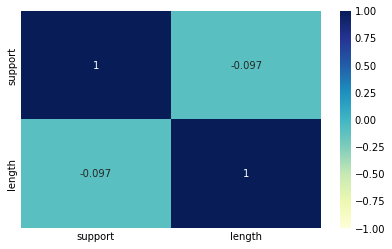

In [83]:
#Visualisasi data dengan heatmap
import seaborn as sns
sns.heatmap(data=fpgrowth_frequent_itemsets.corr(method='spearman'),
           annot=True,
           vmin=-1,
           vmax=1,
           center=0,
           cmap='YlGnBu');

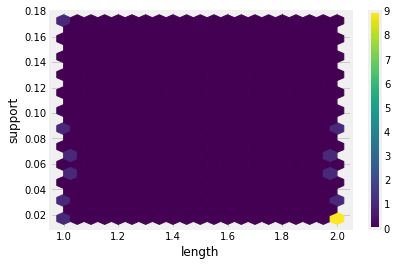

In [84]:
#Visualisasi data dengan hexbin
fpgrowth_frequent_itemsets.plot.hexbin(x='length',y='support',cmap='viridis',gridsize=20,sharex=False,bins=10);

In [85]:
#Menggunakan lift sebagai metode evaluasi skor
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(fpgrowth_frequent_itemsets,metric="lift",min_threshold=0.01)

CPU times: user 18.2 s, sys: 859 ms, total: 19.1 s
Wall time: 25.2 s


In [86]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Anchorman: The Legend of Ron Burgundy (2004)),(Step Brothers (2008)),0.068966,0.051724,0.034483,0.500000,9.666667,0.030916,1.896552
1,(Step Brothers (2008)),(Anchorman: The Legend of Ron Burgundy (2004)),0.051724,0.068966,0.034483,0.666667,9.666667,0.030916,2.793103
2,(Step Brothers (2008)),(Corpse Bride (2005)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
3,(Corpse Bride (2005)),(Step Brothers (2008)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
4,(City of God (Cidade de Deus) (2002)),(Step Brothers (2008)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
...,...,...,...,...,...,...,...,...,...
1549967,(Night of the Shooting Stars (Notte di San Lor...,(Gladiator (2000)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf
1549968,(Night of the Shooting Stars (Notte di San Lor...,(I'm Not Scared (Io non ho paura) (2003)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf
1549969,(I'm Not Scared (Io non ho paura) (2003)),(Night of the Shooting Stars (Notte di San Lor...,0.034483,0.017241,0.017241,0.500000,29.000000,0.016647,1.965517
1549970,(Hard-Boiled (Lat sau san taam) (1992)),(John Wick: Chapter Two (2017)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf


In [87]:
#Mengelompokkan 10 movie teratas
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents        consequents                                             
(Inception (2010)) (Gentlemen Broncos (2009))                          14.5
                   (Life Aquatic with Steve Zissou, The (2004))        14.5
                   (400 Blows, The (Les quatre cents coups) (1959))    14.5
                   (A Pigeon Sat on a Branch Reflecting on Existen...  14.5
                   (Arrival (2016))                                    14.5
                   (Andalusian Dog, An (Chien andalou, Un) (1929))     14.5
                   (Angel's Egg (Tenshi no tamago) (1985))             14.5
                   (Illusionist, The (2006))                           14.5
                   (Dunkirk (2017))                                    14.5
                   (Don't Breathe (2016))                              14.5

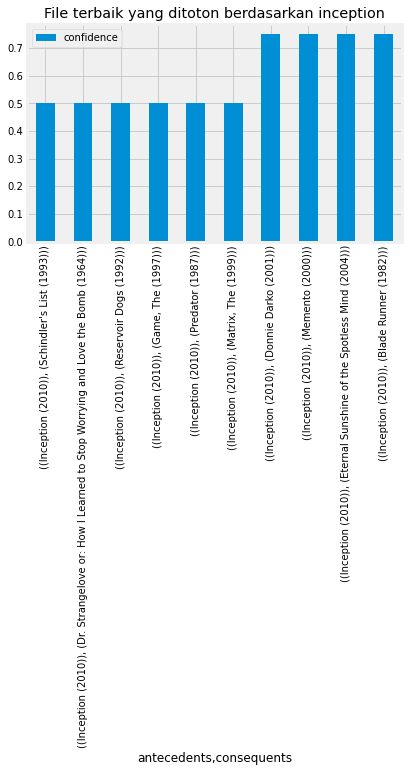

In [88]:
#10 film teratas yang relatif dengan confidence untuk ditonton dengan film pilihan 'Inception'
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('File terbaik yang ditoton berdasarkan inception');

In [89]:
rules['antecedents'] = rules.antecedents.apply(lambda x: next(iter(x)))
rules['consequents'] = rules.consequents.apply(lambda x: next(iter(x)))

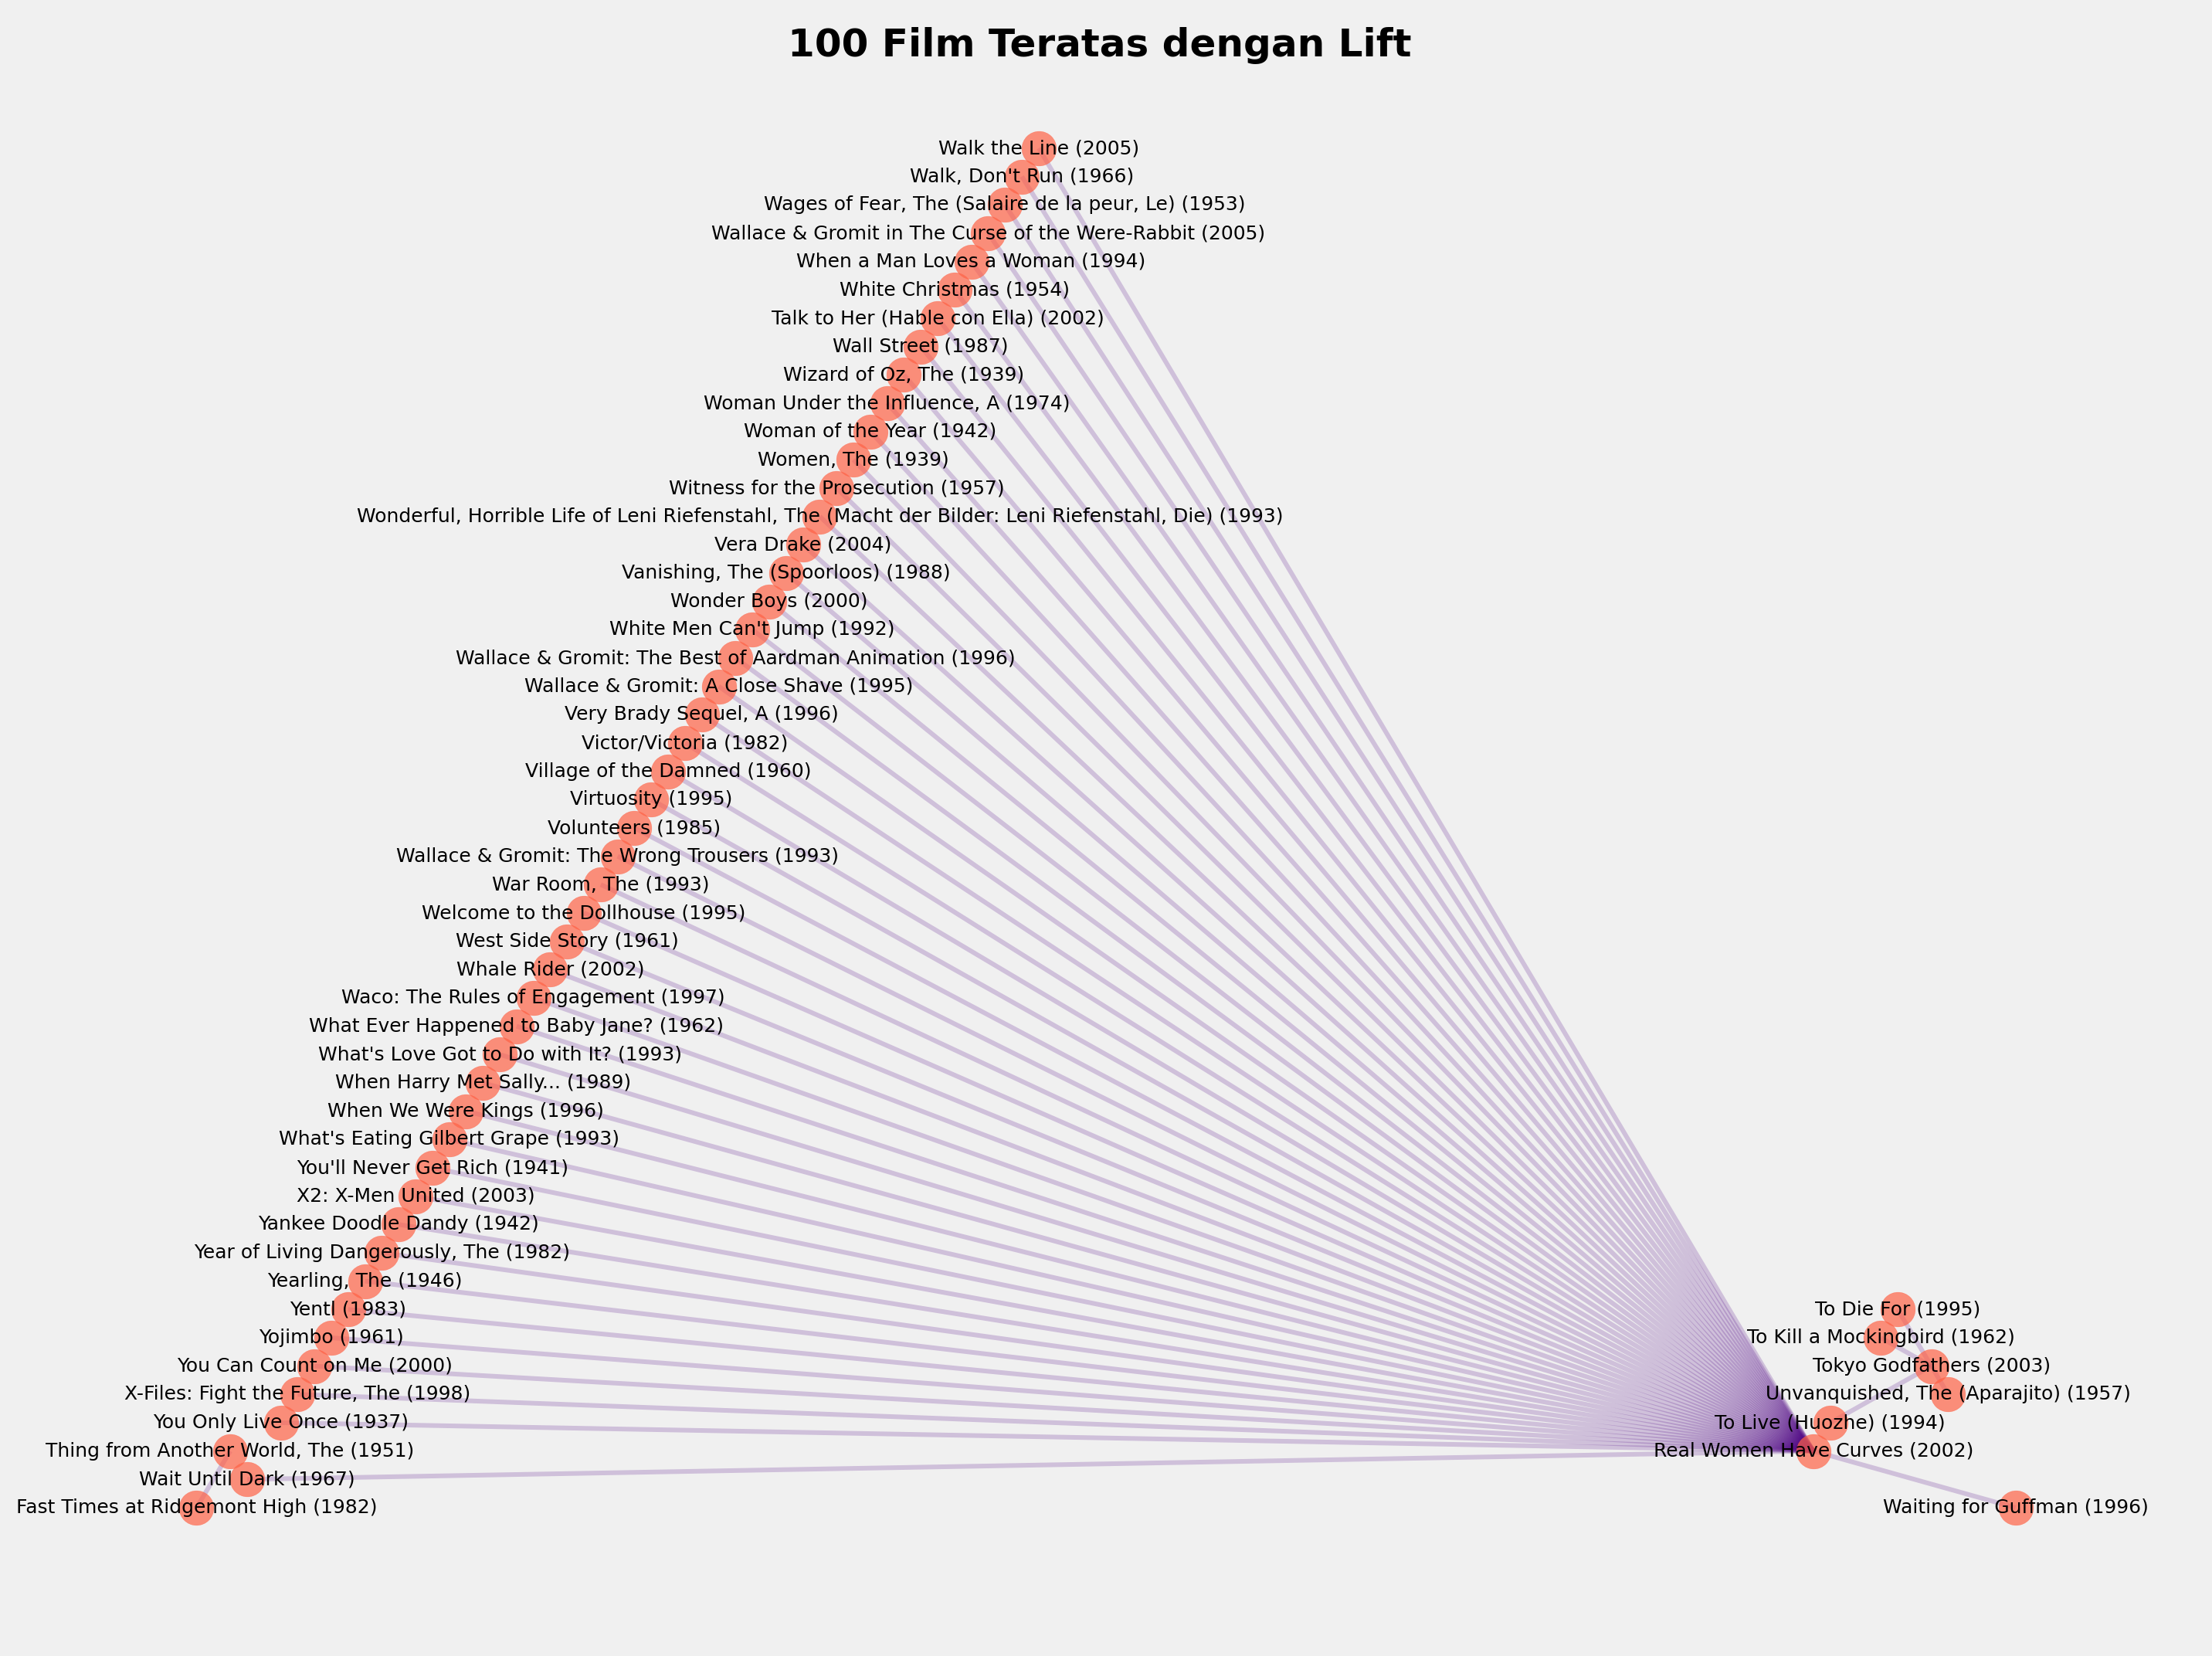

In [91]:
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift').head(100)
                           ,source='antecedents',target='consequents',edge_attr=None)
plt.subplots(figsize=(40,30))
plt.suptitle('100 Film Teratas dengan Lift ', fontsize = 50,fontweight = 'bold')
pos = nx.planar_layout(edges)
nx.draw_networkx_nodes(edges, pos, node_size = 2000,alpha= 0.7,node_color = 'tomato')
nx.draw_networkx_edges(edges, pos, width = 6, alpha = 0.2, edge_color = 'indigo')
nx.draw_networkx_labels(edges, pos, font_size = 25)
plt.grid()
plt.axis('off')
plt.tight_layout()
plt.show()